In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
import cv2

from PIL import Image
from Question1 import MoravecCornerDetection, HarrisCornerDetection

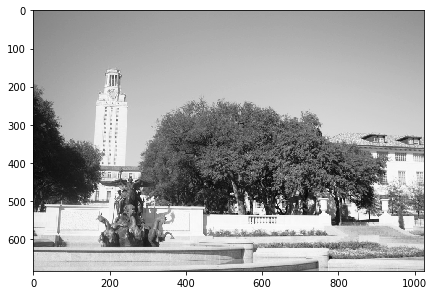

In [2]:
image1 = Image.open("left1.jpg")
gray = image1.convert('L')

plt.figure(figsize=(7,7))
plt.imshow(gray, cmap = cm.Greys_r)

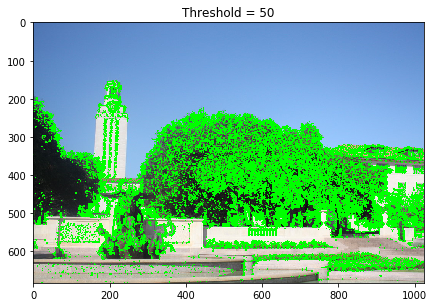

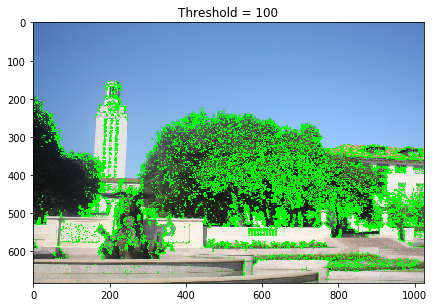

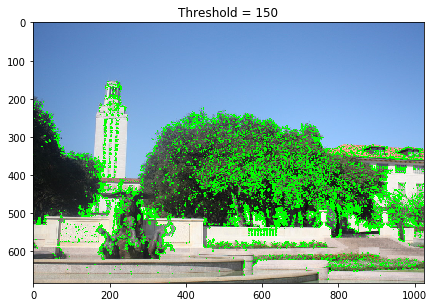

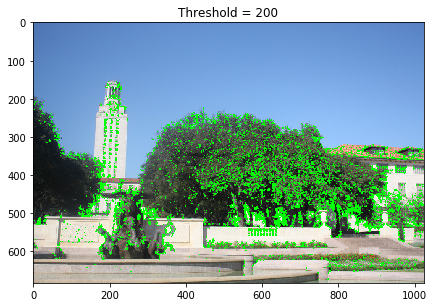

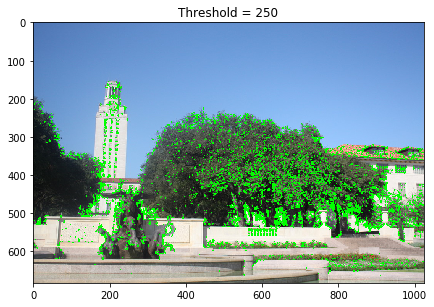

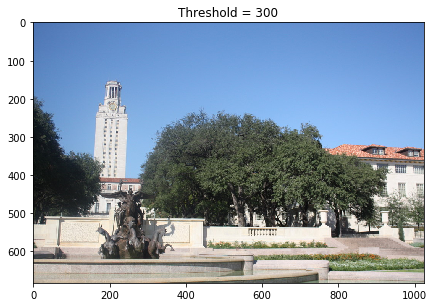

In [3]:
# Moravec

thresh = [50,100,150,200,250,300]

for threshold in thresh:
    cornersMoravec = MoravecCornerDetection(gray, threshold)

    final = np.copy(image1)

    r = 1
    for corner in cornersMoravec:
        for dx in range(-r, r + 1):
            for dy in range(-r, r + 1):
                final[corner[0] + dy, corner[1] + dx] = [0,255, 0]
    
    plt.figure(figsize=(7,7))
    plt.title("Threshold = {}".format(threshold))
    plt.imshow(final, cmap = cm.Greys_r)

In the above images, as threshold varies, the number of corners detected also changes.

For threshold 50, too many corners are detected.
However, for threshold 150 and 200, optimal number of valid coreners are identified. 
From threshold 300 and so on, no corners are identified

Thus, a threshold of 150 is considered as optimal for this image.

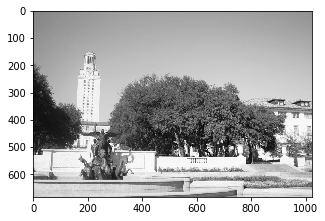

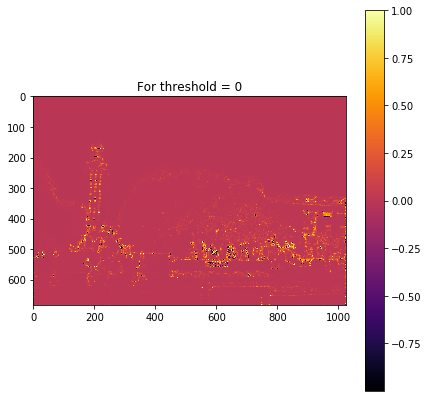

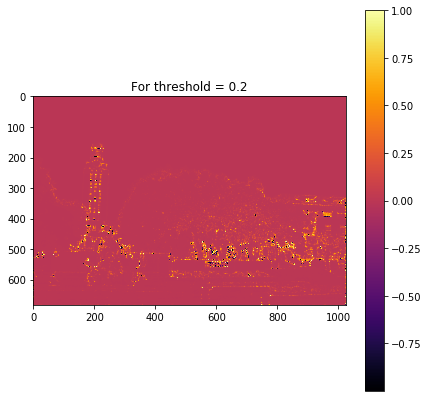

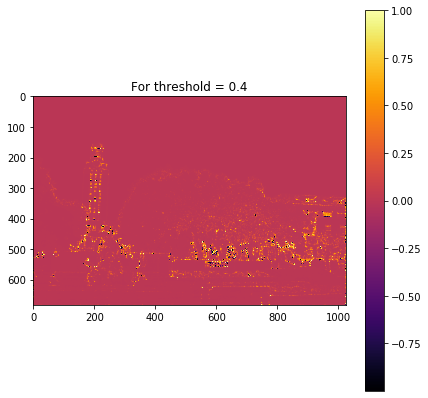

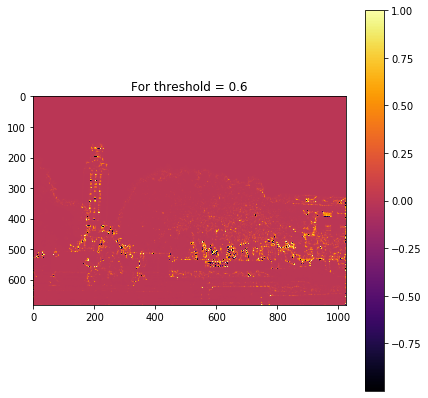

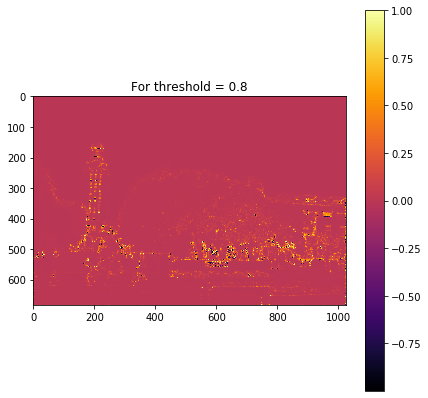

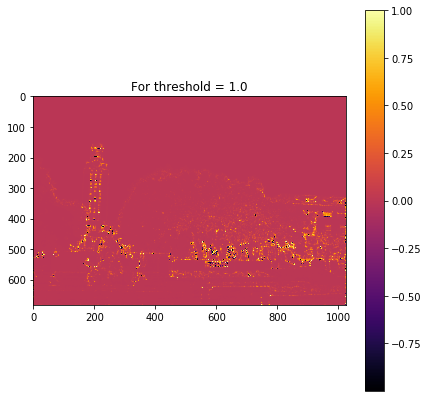

In [5]:
# Harris

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

from PIL import Image
from Question1 import MoravecCornerDetection, HarrisCornerDetection

image1 = Image.open("left1.jpg")
gray = image1.convert('L')
plt.figure(figsize=(5,5))
plt.imshow(gray, cmap = cm.Greys_r)

thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

for t in thresholds:
    img_with_corners = np.copy(image1)

    harris_response,HC = HarrisCornerDetection(gray, threshold = t)

    radius = 1
    for corner in HC:
        for dx in range(-radius, radius):
            for dy in range(-radius, radius):
                img_with_corners[corner[0] + dy, corner[1] + dx] = [0, 0, 255]

    plt.figure(figsize = (7,7))
    plt.title("For threshold = {}".format(t))
    plt.imshow(harris_response, cmap='inferno', interpolation='nearest')
    plt.colorbar()
    plt.show()

Fixing lambda to be 1, for various thresholds as its value increases, the number of coreners detected decreases.
The optimal value of threshold looks like 0.8 for this image.